# Reds Ramsay Data Models

This notebook holds the models for the Red’s Diner In Ramsay restaurant.

### Initialize Firebase connection and setup imports and constants

In [4]:
%run "../common/Firebase.ipynb"
%run "../common/Imports.ipynb"
%run "../common/Models.ipynb"

In [5]:
SALES_COL = "sales_data"
SALES_PRED_COL = "sales_data_pred"
ANALYTICS_COL = "analytics_data"
YEAR_DATA_COL = "year_data"

### Get Sales Data

In [6]:
sales_col = db.collection(SALES_COL).document('kL5sgUcyko7sLSjsUWnK').collection(YEAR_DATA_COL)
sales_data = []

for sales_doc in sales_col.stream():
    sales_data.append(sales_doc.get(None))

remove_cols = ['DATE_FORMATTED', 'NET_SALES_2', 'TOTAL_REVENUE_1', 'TOTAL_REVENUE_4', 'GROSS_RECEIPTS_1', 'TAX_COLLECTED_1', 'GROSS_SALES_4', 'RETAIL_TOT_3', 'GST_4', '2%_OF_NET_SALES_4']
sales_df = pd.DataFrame(sales_data, dtype=np.float64)
sales_df.set_index('DATE', inplace=True)
sales_df.drop(columns=remove_cols, inplace=True)
sales_df.fillna(0, inplace=True)
display(sales_df)

FOOD_NUM_3  MANAGER_MEAL_NUM_3  DRAFT_NUM_3  GUESTS_2  \
DATE                                                                  
1.546326e+09       388.0                 0.0          0.0     289.0   
1.546412e+09       207.0                 0.0          0.0     158.0   
1.546499e+09       222.0                 0.0          0.0     176.0   
1.546585e+09       283.0                 0.0          0.0     209.0   
1.546672e+09       380.0                 0.0          0.0     271.0   
...                  ...                 ...          ...       ...   
1.577516e+09       318.0                 0.0          0.0     249.0   
1.577603e+09       381.0                 0.0          0.0     279.0   
1.577689e+09       351.0                 0.0          0.0     263.0   
1.577776e+09       314.0                 0.0          0.0     229.0   
1.577862e+09       420.0                 0.0          0.0     303.0   

              AVG/CHK_2  TABLES_2  MANAGER_PROMO_TOT_3  LIQUOR_TOT_3  \
DATE                                                                   
1.546326e+09      48.54      97.0               -42.95         156.0   
1.546412e+09      41.75      61.0                 0.00           7.0   
1.546499e+09      41.67      77.0                 0.00          14.0   
1.546585e+09      45.47      76.0                 0.00           0.0   
1.546672e+09      46.44     100.0                 0.00          35.0   
...                 ...       ...                  ...           ...   
1.577516e+09      50.56      91.0               -15.95          63.0   
1.577603e+09      45.06     102.0               -27.00          62.0   
1.577689e+09      54.22      91.0               -10.00          42.0   
1.577776e+09      45.68      88.0               -31.00         105.0   
1.577862e+09      50.72     101.0                -7.50         115.0   

              RETURN_MEAL_TOT_3  TRAINING_TOTAL_1  ...  CARRIED_OVER_1  \
DATE                                               ...                   
1.546326e+09             -34.45               0.0  ...             0.0   
1.546412e+09               0.00               0.0  ...             0.0   
1.546499e+09               0.00               0.0  ...             0.0   
1.546585e+09             -32.00               0.0  ...             0.0   
1.546672e+09             -17.50               0.0  ...             0.0   
...                         ...               ...  ...             ...   
1.577516e+09             -60.65               0.0  ...             0.0   
1.577603e+09            -117.65               0.0  ...             0.0   
1.577689e+09             -23.95               0.0  ...             0.0   
1.577776e+09             -38.90               0.0  ...             0.0   
1.577862e+09             -38.90               0.0  ...             0.0   

              BRUCE_MEAL_NUM_3  MANAGER_MEAL_TOT_3  CHARGED_TIPS_1  CHECKS_2  \
DATE                                                                           
1.546326e+09               0.0                 0.0             0.0     130.0   
1.546412e+09               0.0                 0.0             0.0      75.0   
1.546499e+09               0.0                 0.0             0.0      81.0   
1.546585e+09               0.0                 0.0             0.0      92.0   
1.546672e+09               0.0                 0.0             0.0     124.0   
...                        ...                 ...             ...       ...   
1.577516e+09               0.0                 0.0             0.0     107.0   
1.577603e+09               0.0                 0.0             0.0     133.0   
1.577689e+09               0.0                 0.0             0.0     105.0   
1.577776e+09               0.0                 0.0             0.0     107.0   
1.577862e+09               0.0                 0.0             0.0     134.0   

              CANCEL_1  DRAFT_TOT_3  VOIDS_1  PAGE_NUM  GIFT_CARD_PROMO_NUM_3  
DATE                                                                 

### Preprocess Data

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', None)

In [5]:
# Split into inputs and target
labels = sales_df['NET_SALES_1']
features = sales_df.drop(columns='NET_SALES_1')

X_train, X_test, y_train, y_test = train_test_split(features, labels)

# Normalize data
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

## Exploratory Data Analysis

### Visualization

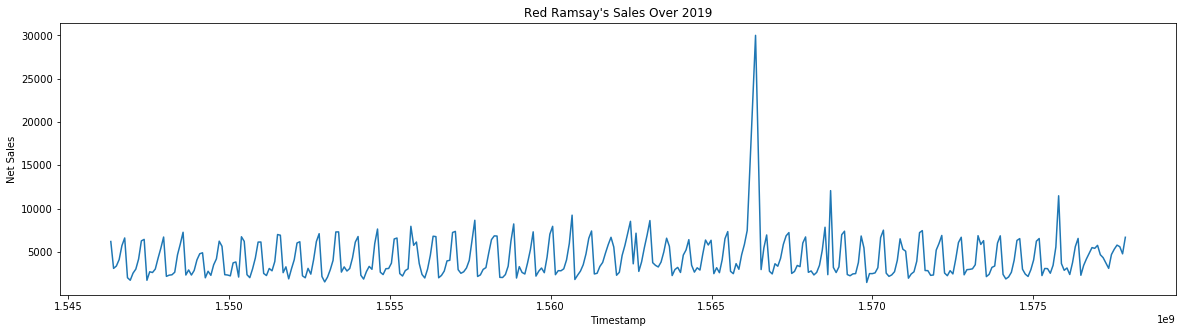

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

timestamps = sales_df.index
net_sales = sales_df['NET_SALES_1']

plt.plot(timestamps, net_sales)
plt.title("Red Ramsay's Sales Over 2019")
plt.xlabel("Timestamp")
plt.ylabel("Net Sales")
plt.show()

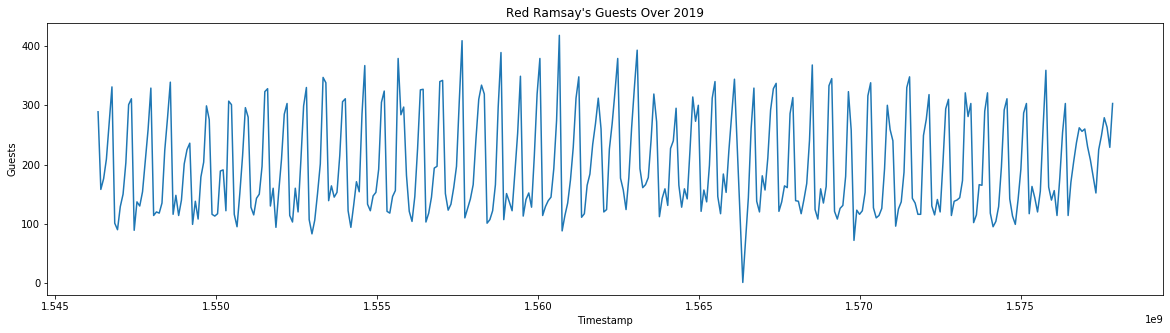

In [19]:
timestamps = sales_df.index
guests = sales_df['GUESTS_2']

plt.plot(timestamps, guests)
plt.title("Red Ramsay's Guests Over 2019")
plt.xlabel("Timestamp")
plt.ylabel("Guests")
plt.show()

### PCA

In [11]:
from sklearn.decomposition import PCA

features_scaled = StandardScaler().fit_transform(features)

pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_scaled)

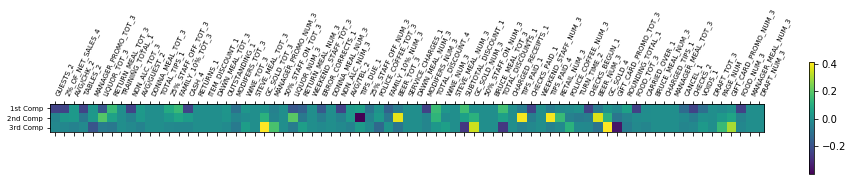

In [12]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'], fontsize=7)
plt.colorbar()
plt.xticks(range(len(features.columns)), features.columns, rotation=65, ha='left', fontsize=7)
plt.tight_layout()
plt.show()

### Create Models

In [10]:
# print(features.columns.tolist())
# first_day = 1577862000
# day = 86400
# future_timestamps = [first_day + (multiplier * day) for multiplier in range(1, 366)]
# future_timestamps = np.array(future_timestamps).reshape(-1, 1)

for model in models:
    model_obj, score = model(X_train, X_test, y_train, y_test)
    print(model.__name__, score)
    if (model.__name__ == "lin_reg"):
        # feature_importance = zip(features.columns.tolist(), model_obj.coef_)
        # a = list(feature_importance)
        # a.sort(key=lambda x: x[1])
        # print(a)
        print(model_obj.predict(future_timestamps))


sgd 0.9999712956930926
mlp -4.414044214552362
lin_reg 0.9999887555464245


ValueError: shapes (365,1) and (74,) not aligned: 1 (dim 1) != 74 (dim 0)

### Predict Sales

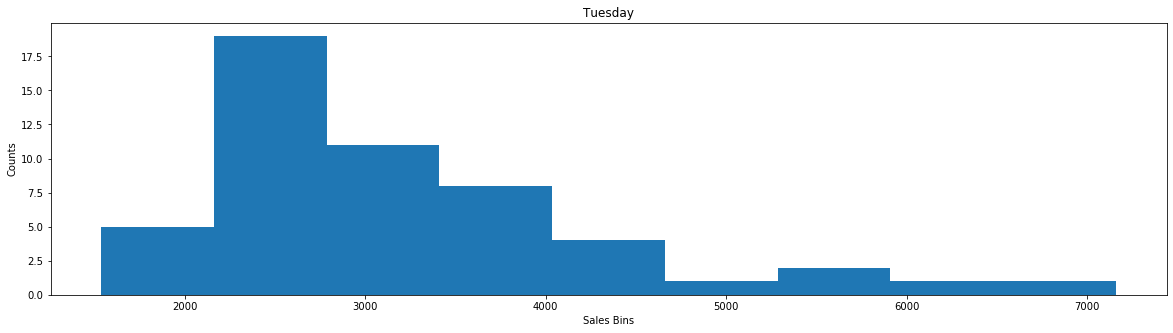

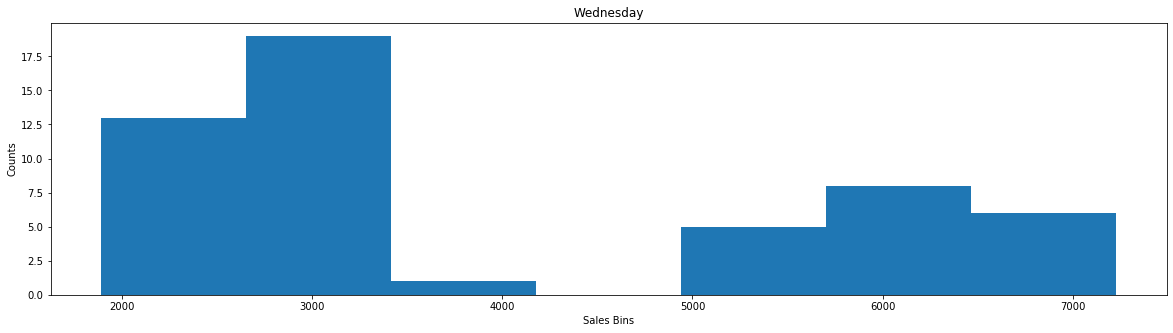

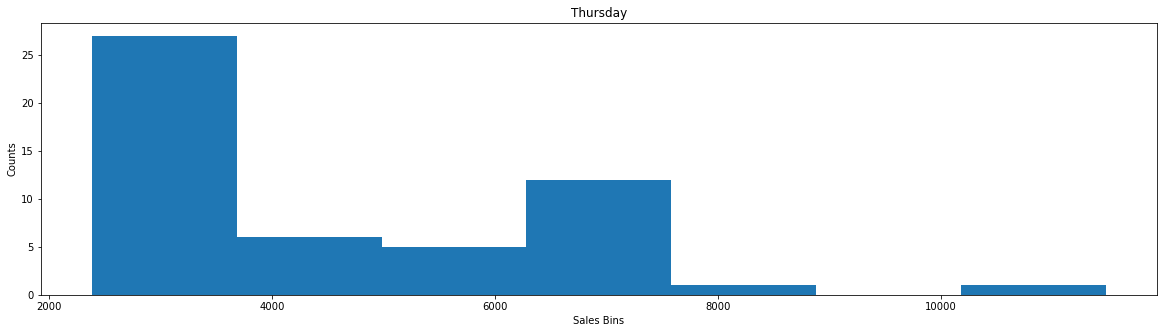

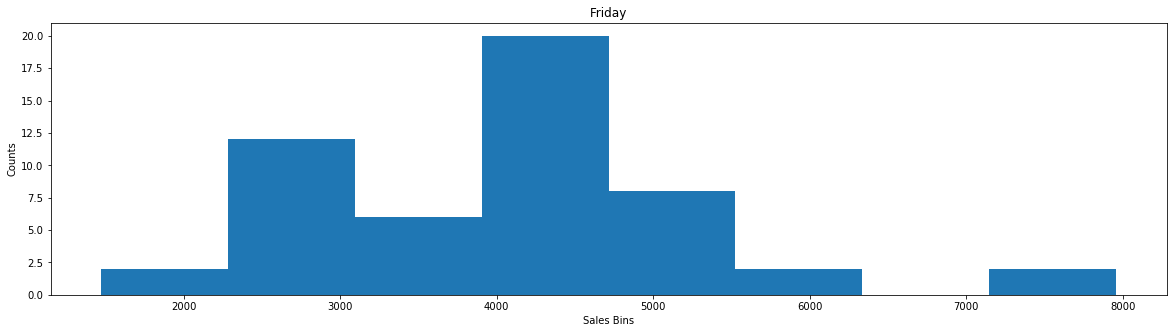

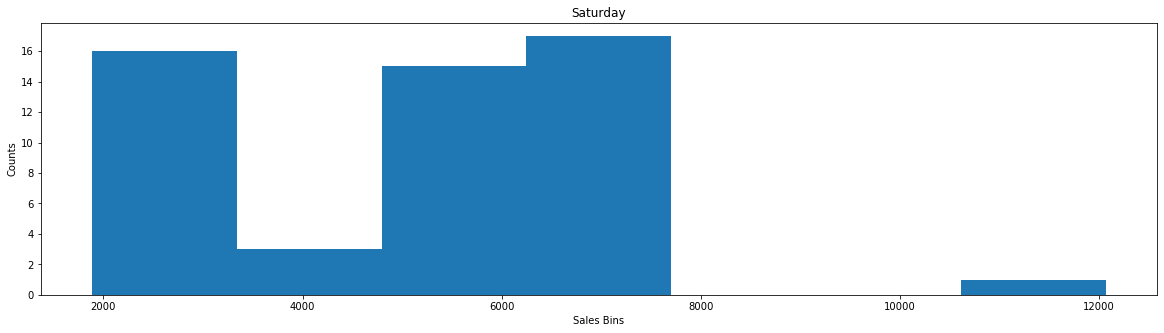

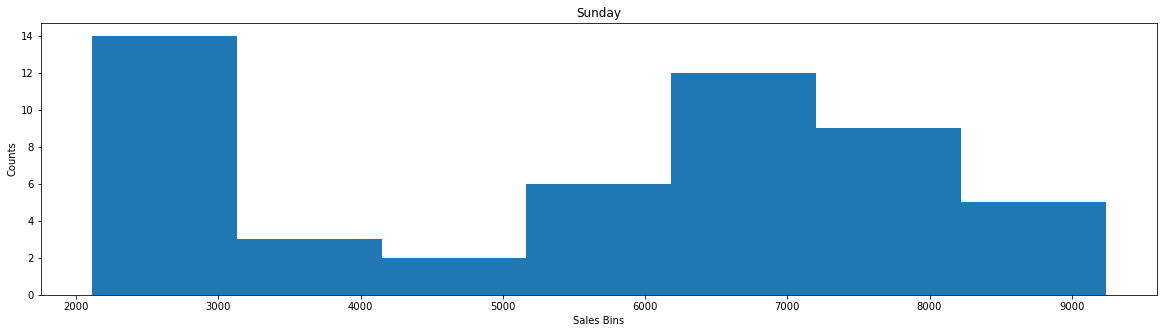

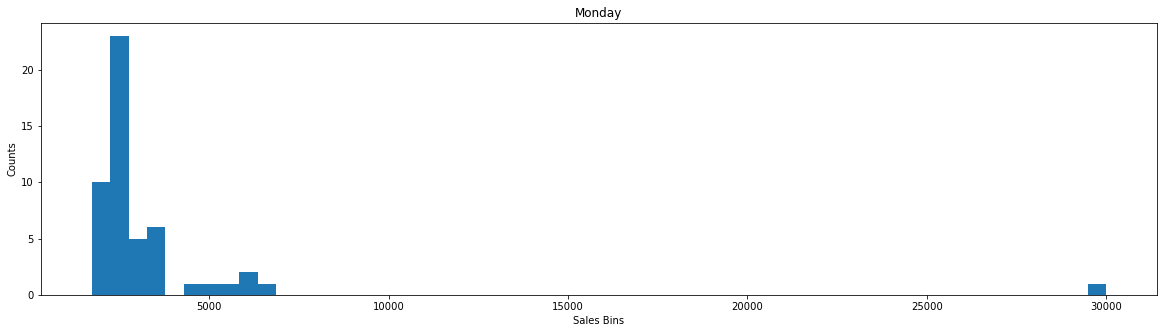

In [9]:
# timestamps = sales_df.index
# net_sales = sales_df['NET_SALES_1']
# timestamp_to_sales = list(zip(timestamps, net_sales))
timestamp_to_sales = list(net_sales)

tuesday_sales = (timestamp_to_sales[::7], "tuesday")
wednesday_sales = (timestamp_to_sales[1::7], "wednesday")
thursday_sales = (timestamp_to_sales[2::7], "thursday")
friday_sales = (timestamp_to_sales[3::7], "friday")
saturday_sales = (timestamp_to_sales[4::7], "saturday")
sunday_sales = (timestamp_to_sales[5::7], "sunday")
monday_sales = (timestamp_to_sales[6::7], "monday")
week_sales = [tuesday_sales, wednesday_sales, thursday_sales, friday_sales,
    saturday_sales, sunday_sales, monday_sales
]

# print(tuesday_sales)
# print(np.min(tuesday_sales), np.max(tuesday_sales))
# print(np.mean(tuesday_sales), np.std(tuesday_sales))

for day, day_name in week_sales:
    plt.hist(day, bins='auto')
    plt.title(day_name.title())
    plt.xlabel("Sales Bins")
    plt.ylabel("Counts")
    plt.show()

In [11]:
bins = [bin for bin in range(1000, 11000, 1000)]
sales_histogram_dict = {"bins": bins}

for day, day_name in week_sales:
    histogram = np.histogram(a=day, bins=bins, range=(1000, 11000))
    sales_histogram_dict[day_name] = histogram[0].tolist()

print(sales_histogram_dict)

{'bins': [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], 'tuesday': [3, 25, 14, 5, 3, 1, 1, 0, 0], 'wednesday': [2, 20, 11, 0, 8, 10, 1, 0, 0], 'thursday': [0, 12, 20, 1, 5, 9, 4, 0, 0], 'friday': [1, 12, 7, 26, 3, 1, 2, 0, 0], 'saturday': [2, 13, 2, 2, 10, 17, 5, 0, 0], 'sunday': [0, 12, 5, 2, 3, 14, 10, 4, 1], 'monday': [3, 33, 8, 2, 1, 3, 0, 0, 0]}


In [13]:
analy_data_col = db.collection(ANALYTICS_COL)
sales_doc = analy_data_col.add({}, "sales")[1]
sales_doc.collection("kL5sgUcyko7sLSjsUWnK").add(sales_histogram_dict, "data")

(seconds: 1584950488
 nanos: 940413000,
 <google.cloud.firestore_v1.document.DocumentReference at 0x1597a649d88>)

In [14]:
bin_width = 100
bins_pred = [bin for bin in range(1000, 11000, bin_width)]
sales_histogram_pred_dict = {}

for day, day_name in week_sales:
    histogram_pred = np.histogram(a=day, bins=bins_pred, range=(1000, 11000), density=True)
    prob_dist = histogram_pred[0] * bin_width
    sales_histogram_pred_dict[day_name] = prob_dist.tolist()

print(sales_histogram_pred_dict)

{'tuesday': [0.0, 0.0, 0.0, 0.0, 0.0, 0.019230769230769232, 0.0, 0.019230769230769232, 0.019230769230769232, 0.0, 0.038461538461538464, 0.0, 0.05769230769230769, 0.15384615384615385, 0.038461538461538464, 0.038461538461538464, 0.019230769230769232, 0.05769230769230769, 0.019230769230769232, 0.05769230769230769, 0.0, 0.019230769230769232, 0.09615384615384616, 0.019230769230769232, 0.05769230769230769, 0.019230769230769232, 0.0, 0.038461538461538464, 0.0, 0.019230769230769232, 0.05769230769230769, 0.019230769230769232, 0.019230769230769232, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019230769230769232, 0.019230769230769232, 0.019230769230769232, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019230769230769232, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019230769230769232, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'wednesday': [0.0, 0.0, 0.0, 0.0, 0.0, 

In [24]:
sales_pred = []

jan_first_twentytwenty = 1577862000
twentytwenty_timestamps = [jan_first_twentytwenty + (multiplier * 86400) for multiplier in range(1, 366)]

week_cycle = ["thursday", "friday", "saturday", "sunday", "monday", "tuesday", "wednesday"]
week_counter = 0

for timestamp in twentytwenty_timestamps:
    day_name = week_cycle[week_counter]
    day_prob_dist = sales_histogram_pred_dict[day_name]
    day_sales_pred = np.random.choice(a=bins_pred[:-1], p=day_prob_dist) + np.random.randint(bin_width)
    sales_pred.append(day_sales_pred)
    week_counter = (week_counter + 1) % 7

print(sales_pred)

[3083, 4494, 6243, 6149, 2611, 3988, 6909, 6551, 4279, 2044, 8634, 4653, 3980, 6806, 6548, 5041, 5984, 2477, 3684, 2930, 6071, 6504, 4122, 2447, 7973, 2621, 1788, 3183, 3070, 7966, 2834, 2307, 2212, 3286, 2254, 3189, 2309, 5473, 6474, 2380, 3496, 3198, 3300, 1457, 2282, 6762, 2357, 7109, 2568, 6831, 2728, 2113, 8212, 2120, 2274, 5886, 3040, 3885, 1840, 6147, 3413, 4027, 3689, 6731, 4602, 2857, 2145, 2063, 2756, 2758, 5885, 4875, 6022, 3162, 2644, 3502, 2770, 2939, 4616, 2497, 7346, 2359, 6250, 2503, 3916, 7232, 2183, 7678, 2624, 1812, 5194, 3093, 2663, 6246, 7655, 3707, 3429, 5102, 2963, 4941, 2527, 2357, 2918, 2639, 6268, 2636, 4779, 2943, 8559, 2654, 2319, 2874, 6889, 4025, 7195, 8261, 2778, 2562, 2953, 2804, 4102, 5852, 4163, 2337, 2475, 6018, 4584, 3858, 2226, 2351, 1826, 3724, 2330, 3386, 2870, 2496, 8294, 2062, 2509, 2843, 3735, 7923, 2489, 2411, 6255, 3739, 2659, 3077, 4860, 2944, 7976, 2337, 2395, 6689, 4551, 5099, 1862, 5634, 2924, 5303, 2792, 2350, 4232, 2846, 6790, 2307, 230

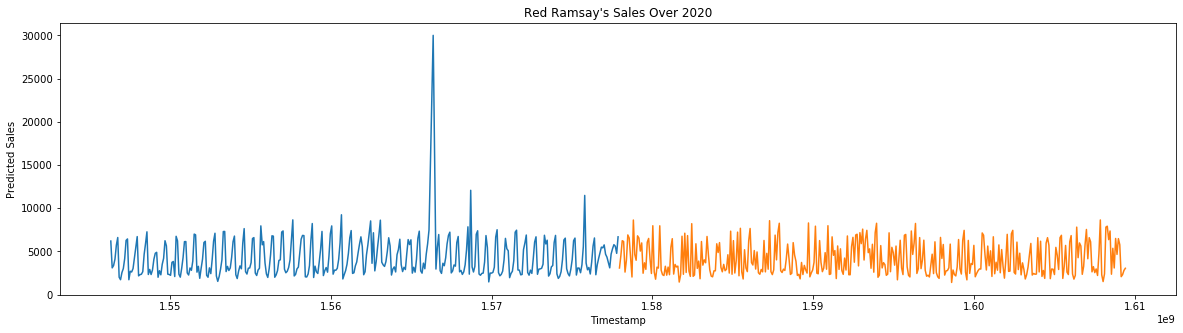

In [25]:
plt.plot(timestamps, net_sales)
plt.plot(twentytwenty_timestamps, sales_pred)
plt.title("Red Ramsay's Sales Over 2020")
plt.xlabel("Timestamp")
plt.ylabel("Predicted Sales")
plt.show()

In [17]:
sales_pred_dict = dict(zip([str(timestamps) for timestamps in twentytwenty_timestamps], np.array(sales_pred).tolist()))
sales_pred_col = db.collection(SALES_PRED_COL)
sales_pred_doc = sales_pred_col.add({}, "kL5sgUcyko7sLSjsUWnK")[1]

for timestamp, sales_pred in sales_pred_dict.items():
    data = {'timestamp': timestamp, "NET_SALES_PRED": sales_pred}
    sales_pred_doc.collection("year_data").add(data, timestamp)

### Predict Guests

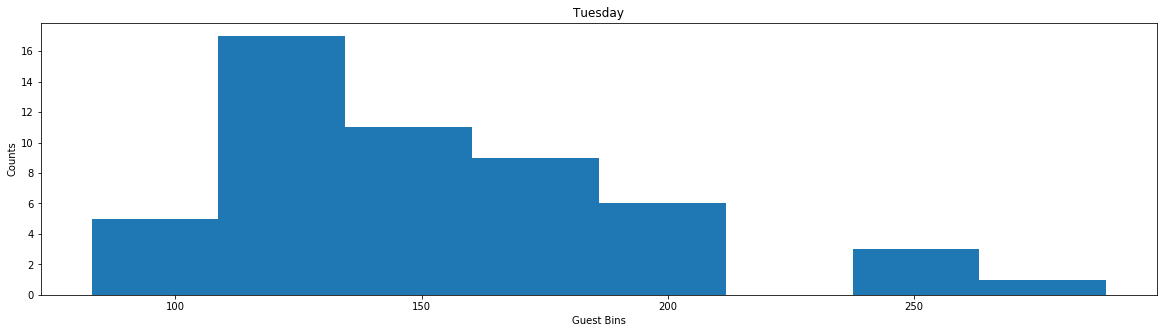

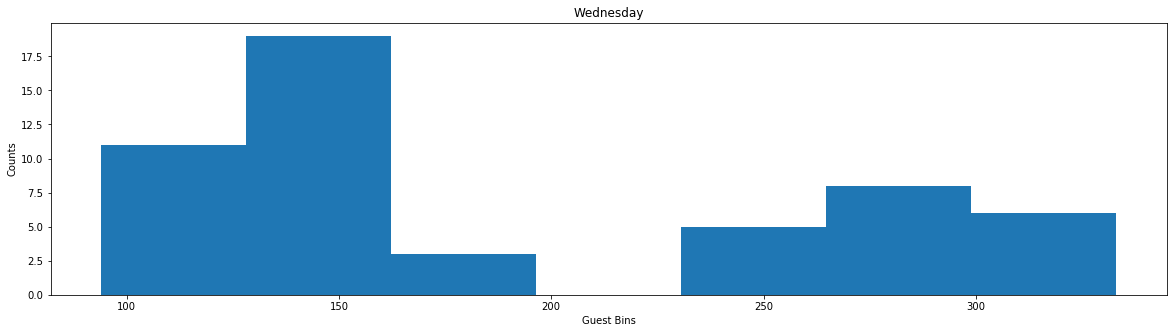

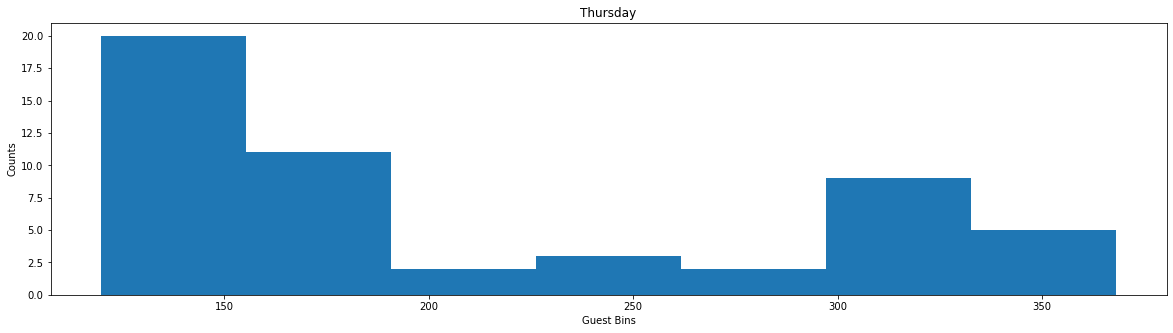

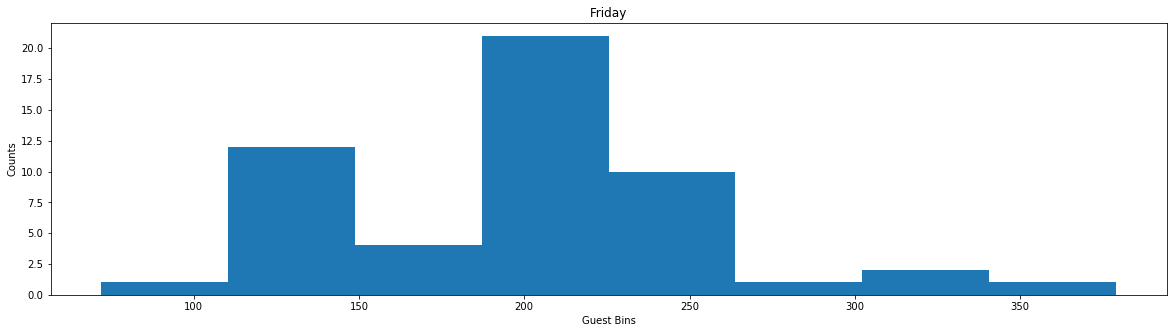

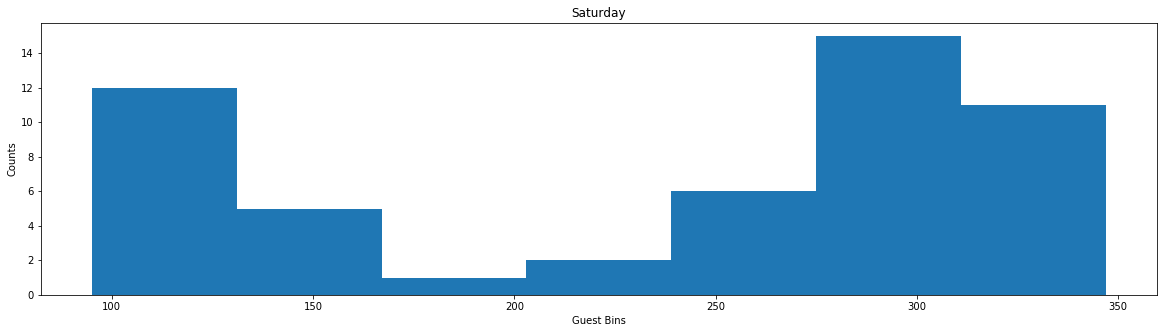

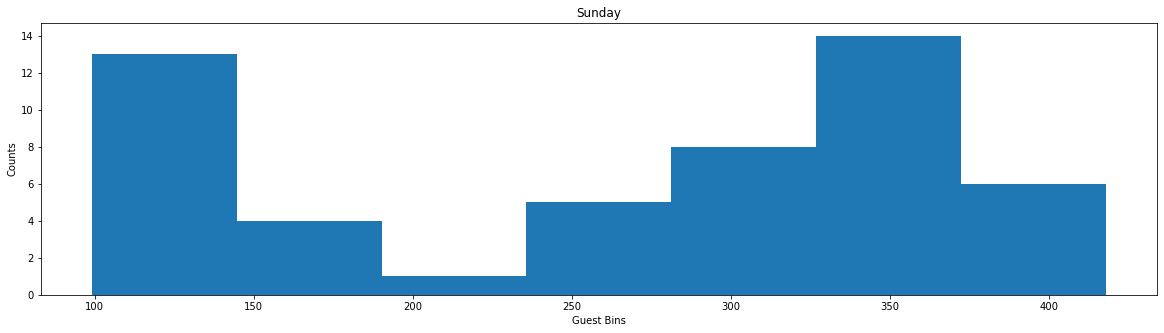

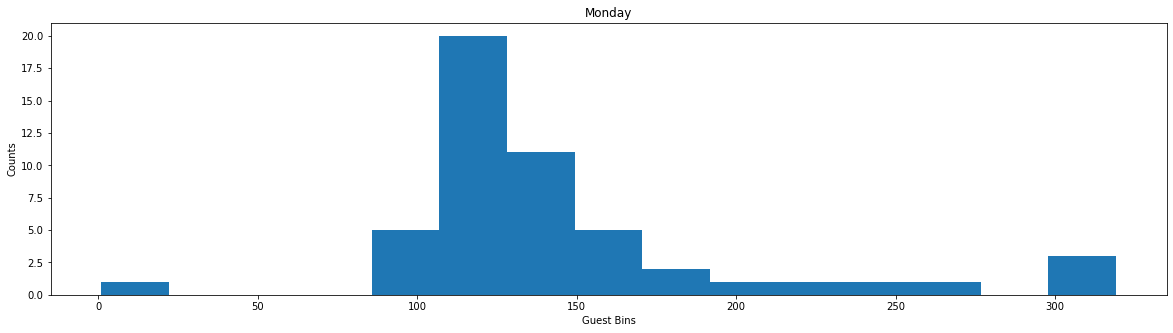

In [20]:
# timestamps = sales_df.index
# guests = sales_df['GUESTS_2']

guests = list(guests)

tuesday_guests = (guests[::7], "tuesday")
wednesday_guests = (guests[1::7], "wednesday")
thursday_guests = (guests[2::7], "thursday")
friday_guests = (guests[3::7], "friday")
saturday_guests = (guests[4::7], "saturday")
sunday_guests = (guests[5::7], "sunday")
monday_guests = (guests[6::7], "monday")
week_guests = [tuesday_guests, wednesday_guests, thursday_guests, friday_guests,
    saturday_guests, sunday_guests, monday_guests
]

for day, day_name in week_guests:
    plt.hist(day, bins='auto')
    plt.title(day_name.title())
    plt.xlabel("Guest Bins")
    plt.ylabel("Counts")
    plt.show()

In [21]:
bins = [bin for bin in range(0, 500, 50)]
guests_histogram_dict = {"bins": bins}

for day, day_name in week_guests:
    histogram = np.histogram(a=day, bins=bins)
    guests_histogram_dict[day_name] = histogram[0].tolist()

print(guests_histogram_dict)

{'bins': [0, 50, 100, 150, 200, 250, 300, 350, 400, 450], 'tuesday': [0, 3, 25, 18, 4, 2, 0, 0, 0], 'wednesday': [0, 2, 22, 9, 1, 12, 6, 0, 0], 'thursday': [0, 0, 11, 21, 1, 5, 12, 2, 0], 'friday': [0, 1, 12, 11, 23, 2, 2, 1, 0], 'saturday': [0, 2, 14, 2, 3, 14, 17, 0, 0], 'sunday': [0, 1, 12, 4, 2, 6, 19, 5, 2], 'monday': [1, 3, 33, 8, 2, 1, 3, 0, 0]}


In [22]:
analy_data_col = db.collection(ANALYTICS_COL)
guest_doc = analy_data_col.add({}, "guests")[1]
guest_doc.collection("kL5sgUcyko7sLSjsUWnK").add(guests_histogram_dict, "data")

(seconds: 1584950664
 nanos: 259736000,
 <google.cloud.firestore_v1.document.DocumentReference at 0x1597a74d248>)